# Linear Regression Model Training
### Read in features and labels
### Do some multivariate linear regression
### See how good the fits are

In [71]:
# imports
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import random
from sklearn import linear_model
import statsmodels.formula.api as smf

%matplotlib inline

In [72]:
# use scaled features and labels or not
scaled = False

In [73]:
# define extra bit for filenames, in case of only using one NAICS code
extras = ['all','44','45','56','62']
i = 1
extra = '_'+extras[i]

In [74]:
# read in labeled examples (see build_features_labels.ipynb for more info)
labels = np.genfromtxt('data_final/labels_scaled'+extra+'.csv')
# save number of businesses (i.e., examples)
n_examples = len(labels)
print n_examples
print labels[:10]

255
[ 50.6  48.8  48.8  21.3  13.3  40.9  15.7  35.1  11.2  20.5]


In [75]:
# read-in features (see build_features_labels.ipynb for more info)
if scaled:
    features = np.genfromtxt('data_final/features_scaled'+extra+'.csv', delimiter=',')
    means_stddevs = np.genfromtxt('data_final/means_stddevs'+extra+'.csv', delimiter=',')
else:
    features = np.genfromtxt('data_final/features'+extra+'.csv', delimiter=',')
print features.shape
# cut only features we wanna use right now
###features = features[:,np.array([0,1,2,3,4,5])]
###if scaled:
###    means = means_stddevs[0,np.array([0,1,2,3,4,5])]
###    stddevs = means_stddevs[1,np.array([0,1,2,3,4,5])]
# for only Nth feature, use 5 lines below instead of 4 above
###N = 6
###features = features[:, np.newaxis, N]
###if scaled:
###    means = means_stddevs[0, np.newaxis, N]
###    stddevs = means_stddevs[1, np.newaxis, N]
print features.shape
print features[:10]

(255, 22)
(255, 22)
[[  3.02900000e+03   5.01000000e-01   4.99000000e-01   5.03000000e+01
    4.98000000e+01   4.98000000e+01   1.81000000e-01   8.19000000e-01
    1.39700000e+03   5.89000000e+01   2.31000000e+01   1.80000000e+01
    5.46000000e+01   1.06406000e+05   1.15066000e+05   2.78130000e+04
    1.89500000e+03   1.92300000e+03   1.83900000e+03   0.00000000e+00
    1.33000000e+02   2.00000000e+00]
 [  1.80100000e+03   4.69000000e-01   5.31000000e-01   4.65000000e+01
    4.55000000e+01   4.55000000e+01   1.31000000e-01   8.69000000e-01
    1.04700000e+03   3.41000000e+01   1.11000000e+01   5.48000000e+01
    6.92000000e+01   9.79760000e+04   1.57500000e+05   4.28910000e+04
    1.33800000e+03   2.24300000e+03   9.74000000e+02   4.16177300e+06
    1.82000000e+02   9.00000000e+00]
 [  4.20800000e+03   5.06000000e-01   4.94000000e-01   3.96000000e+01
    4.00000000e+01   4.00000000e+01   1.16000000e-01   8.84000000e-01
    2.41300000e+03   3.27000000e+01   9.50000000e+00   5.78000000e

### Split examples into training and testing sets (but probably too few to be meaningful)

In [76]:
# get a random ordering of the indeces
rando_order = random.sample(range(n_examples),n_examples)
#print rando_order

# find the index cutoff for given percentage to be used in the test set
percent_test = 20
index_cutoff = np.int(n_examples*percent_test/100)
print index_cutoff

51


In [77]:
# split the random ordering into training and testing
trainers = rando_order[index_cutoff:]
#print trainers
testers = rando_order[:index_cutoff]
#print testers

# *randomly* split the data into training/testing sets
features_train = features[trainers]#,:]
features_test = features[testers]#,:]
print features.shape
print features_train.shape
print features_test.shape
labels_train = labels[trainers]
labels_test = labels[testers]
print labels.shape
print labels_train.shape
print labels_test.shape
#print labels_train
#print labels_test

(255, 22)
(204, 22)
(51, 22)
(255,)
(204,)
(51,)


### As of this point, the features and labels are read-in and randomly split into training and testing sets (80/20)

In [78]:
# create linear regression object, fitting intercept and normalizing features
regr = linear_model.LinearRegression(normalize=True)

# train the model using the training sets
regr.fit(features_train, labels_train)

# intercept and coefficients of fit
print "Intercept = "+str(regr.intercept_)
print "Coefficients:"
print regr.coef_

Intercept = 8.33812122481e+15
Coefficients:
[  4.83836124e-04  -8.33812122e+15  -8.33812122e+15  -1.81347871e-01
   7.23346063e+12  -7.23346063e+12   2.92267686e+03   2.90983818e+03
   2.00188916e-04  -2.91700862e+01  -2.88417336e+01  -2.90369882e+01
   1.79376045e-01   1.93298526e-04  -4.46426429e-05  -1.98799126e-05
  -1.29797182e-02   2.32642102e-03   3.78089292e-03   3.90557937e-08
   9.58858701e-03  -1.52181903e-01]


## Use scikit-learn

In [79]:
# do some scoring
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
from sklearn.feature_selection import f_regression

# root mean square error
print("RMSE %.3f" % np.sqrt(mean_squared_error(labels_test,regr.predict(features_test))))
# explained variance score: 1 is perfect prediction
print("Explained Variance Score (1 is perfect): %.3f" % \
      explained_variance_score(labels_test,regr.predict(features_test)))
# r-squared value
print("r-squared value: %.3f" % regr.score(features_test, labels_test))
# mean absolute error
print("Mean Absolute Error %.3f" % mean_absolute_error(labels_test,regr.predict(features_test)))
# F regression
f_p = f_regression(features_test, labels_test)
print "F-values of features:"
print f_p[0]
print "p-values of F scores:"
print f_p[1]

RMSE 15.208
Explained Variance Score (1 is perfect): 0.014
r-squared value: 0.008
Mean Absolute Error 11.386
F-values of features:
[  2.42585855e+00   2.00968585e+00   2.00968585e+00   4.23560977e-01
   7.98365810e-01   7.98365810e-01   4.20340860e-01   4.20340860e-01
   7.45413060e-01   1.84263298e-01   2.73063643e+00   8.41415066e-03
   3.94696906e-01   3.49754626e-01   1.10609023e-01   1.85104787e-01
   3.77299163e-01   7.09123778e-02   2.41326920e-03   2.10702642e-01
   1.98312640e-02   5.31814495e-03]
p-values of F scores:
[ 0.12578383  0.16262567  0.16262567  0.51820588  0.37595004  0.37595004
  0.51979385  0.51979385  0.39213884  0.66961632  0.10483452  0.9272876
  0.53275827  0.5569707   0.74087052  0.66890889  0.54189387  0.79113035
  0.96101935  0.64824704  0.8885867   0.94216219]


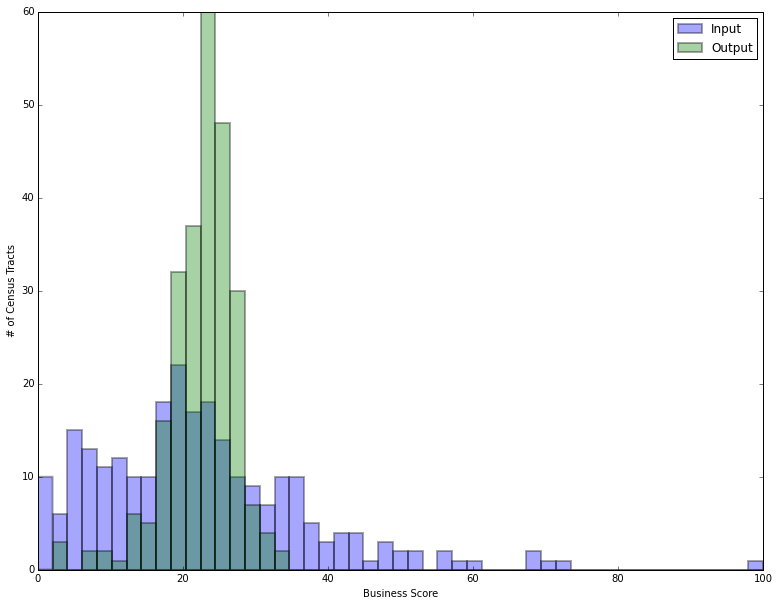

In [80]:
# use coefficients to calculate score for each census tract
scores = regr.predict(features)
# make histogram of scores
plt.figure(figsize=(13, 10))
bin_width = 2
bins = np.linspace(min(labels), max(labels), (max(labels)-min(labels))/bin_width)
plt.hist(labels, bins, linewidth=2, alpha=0.35, label='Input');
plt.hist(scores, bins, linewidth=2, alpha=0.35, label='Output');
plt.xlim([min(labels),max(labels)])
plt.legend(loc=0)
plt.xlabel('Business Score')
plt.ylabel('# of Census Tracts')

## Use statsmodels (w/ all input features)

In [81]:
# turn features and labels into dataframe
#df_new = pd.DataFrame({'Score': labels, 'Population': features[:,0], 'Median_Age': features[:,1], \
#                       'Num_Homes': features[:,2], 'Employment_Percentage': features[:,3], \
#                       'Median_Income': features[:,4], 'Median_Housing_Cost': features[:,5]})
df_new = pd.DataFrame({'Score': labels, 'Population': features[:,0], 'Population_Percent_Male': features[:,1], \
                       'Population_Percent_Female': features[:,2], 'Median_Age': features[:,3], \
                       'Median_Age_Male': features[:,4], 'Median_Age_Female': features[:,5], \
                       'Percent_Minor': features[:,6], 'Percent_Adult': features[:,7], \
                       'Num_Homes': features[:,8], 'Homes_Percent_Mortgage': features[:,9], \
                       'Homes_Percent_Clear': features[:,10], 'Homes_Percent_Rent': features[:,11], \
                       'Employment_Percentage': features[:,12], 'Median_Income': features[:,13], \
                       'Median_Income_Owner': features[:,14], 'Median_Income_Renter': features[:,15], \
                       'Median_Housing_Cost': features[:,16], 'Median_Housing_Cost_Owner': features[:,17], \
                       'Median_Housing_Cost_Renter': features[:,18], 'Parking_Meter_Amount': features[:,19], \
                       'Num_Businesses': features[:,20], 'Num_Businesses_Code': features[:,21]})
df_new[:10]

,Employment_Percentage,Homes_Percent_Clear,Homes_Percent_Mortgage,Homes_Percent_Rent,Median_Age,Median_Age_Female,Median_Age_Male,Median_Housing_Cost,Median_Housing_Cost_Owner,Median_Housing_Cost_Renter,...,Num_Businesses,Num_Businesses_Code,Num_Homes,Parking_Meter_Amount,Percent_Adult,Percent_Minor,Population,Population_Percent_Female,Population_Percent_Male,Score
0,54.6,23.1,58.9,18.0,50.3,49.8,49.8,1895.0,1923.0,1839.0,...,133.0,2.0,1397.0,0.0,0.819,0.181,3029.0,0.499,0.501,50.6
1,69.2,11.1,34.1,54.8,46.5,45.5,45.5,1338.0,2243.0,974.0,...,182.0,9.0,1047.0,4161773.0,0.869,0.131,1801.0,0.531,0.469,48.8
2,75.0,9.5,32.7,57.8,39.6,40.0,40.0,1559.0,2026.0,1445.0,...,184.0,8.0,2413.0,11290108.0,0.884,0.116,4208.0,0.494,0.506,48.8
3,71.2,6.6,21.5,71.9,38.8,40.9,40.9,1394.0,2310.0,1282.0,...,493.0,23.0,3136.0,68427664.0,0.950,0.050,4732.0,0.480,0.520,21.3
4,75.4,3.4,12.2,84.4,35.5,38.2,38.2,1299.0,1870.0,1255.0,...,480.0,24.0,2288.0,44826639.0,0.952,0.048,3669.0,0.450,0.550,13.3
5,79.8,8.1,26.7,65.2,39.8,40.6,40.6,1224.0,1819.0,1145.0,...,202.0,8.0,1726.0,2167540.0,0.922,0.078,2722.0,0.502,0.498,40.9
6,77.5,6.6,23.4,70.1,38.6,40.1,40.1,1216.0,1587.0,1181.0,...,251.0,19.0,1984.0,1183230.0,0.941,0.059,3108.0,0.470,0.530,15.7
7,74.9,5.2,20.1,74.7,38.2,40.0,40.0,1347.0,2417.0,1241.0,...,214.0,11.0,2479.0,11955695.0,0.947,0.053,3754.0,0.465,0.535,35.1
8,72.0,5.5,23.3,71.2,36.3,38.0,38.0,1093.0,1808.0,1011.0,...,134.0,4.0,2663.0,1451274.0,0.890,0.110,4280.0,0.471,0.529,11.2
9,79.4,1.5,13.4,85.1,34.3,35.3,35.3,1056.0,1804.0,995.0,...,235.0,17.0,3141.0,3235196.0,0.889,0.111,5178.0,0.478,0.522,20.5


In [82]:
# fit the data
lm = smf.ols(formula='Score ~ Population + Population_Percent_Male + Population_Percent_Female + Median_Age + Median_Age_Male + Median_Age_Female + Percent_Minor + Percent_Adult + Num_Homes + Homes_Percent_Mortgage + Homes_Percent_Clear + Homes_Percent_Rent + Employment_Percentage + Median_Income + Median_Income_Owner + Median_Income_Renter + Median_Housing_Cost + Median_Housing_Cost_Owner + Median_Housing_Cost_Renter + Parking_Meter_Amount + Num_Businesses + Num_Businesses_Code',data=df_new).fit()
# print the coefficients
lm.params

Intercept                     7.114778e+00
Population                    1.525420e-04
Population_Percent_Male      -2.700585e+01
Population_Percent_Female     3.412063e+01
Median_Age                   -1.230090e+00
Median_Age_Male               6.499931e-01
Median_Age_Female             6.499930e-01
Percent_Minor                 1.375627e+03
Percent_Adult                 1.358758e+03
Num_Homes                    -2.784294e-04
Homes_Percent_Mortgage       -1.369753e+01
Homes_Percent_Clear          -1.328971e+01
Homes_Percent_Rent           -1.358260e+01
Employment_Percentage         1.443079e-01
Median_Income                 1.758169e-04
Median_Income_Owner          -4.175500e-05
Median_Income_Renter         -3.833157e-05
Median_Housing_Cost          -1.312701e-02
Median_Housing_Cost_Owner     3.054911e-03
Median_Housing_Cost_Renter    4.582112e-03
Parking_Meter_Amount          1.636006e-08
Num_Businesses                9.273442e-03
Num_Businesses_Code          -1.226513e-01
dtype: floa

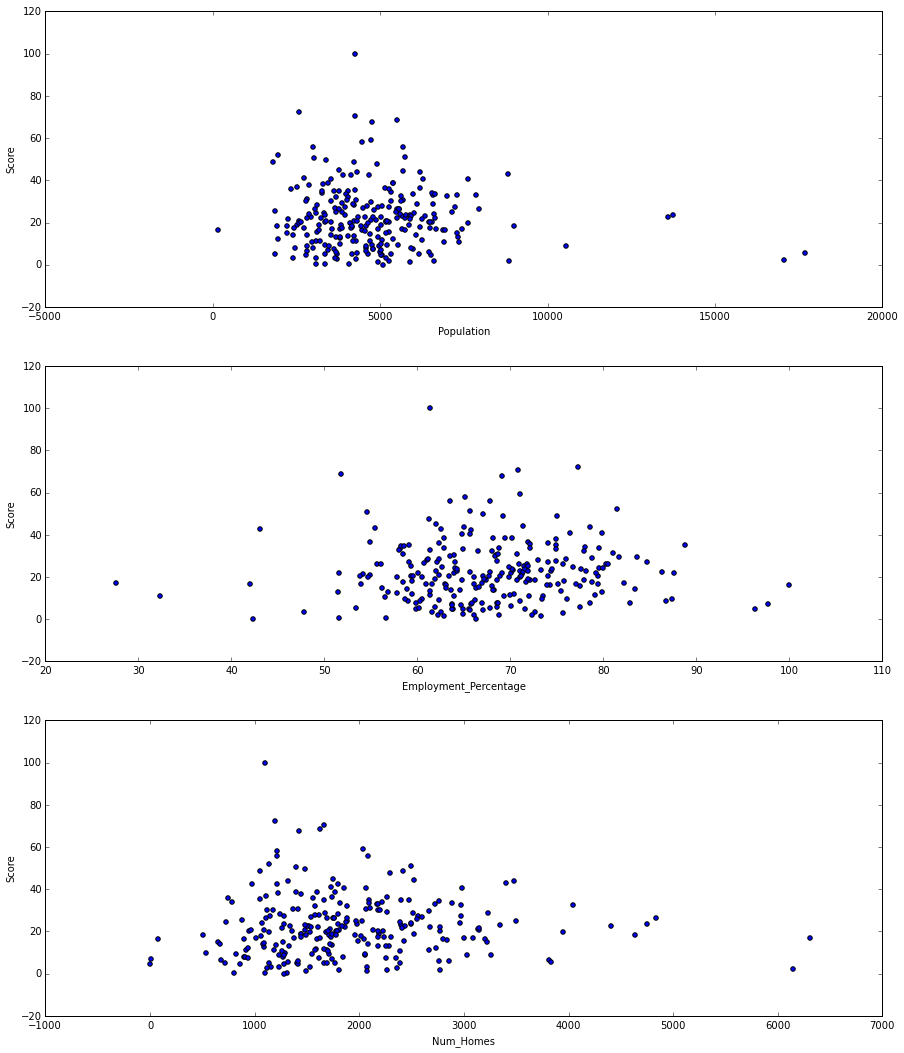

In [83]:
# plot features vs. score
fig, axs = plt.subplots(3,1, sharey=True)
df_new.plot(kind='scatter', x='Population', y='Score', ax=axs[0], figsize=(15, 18))
###axs[0].plot(pop, pop_preds, c='red', linewidth=2)
df_new.plot(kind='scatter', x='Employment_Percentage', y='Score', ax=axs[1])
df_new.plot(kind='scatter', x='Num_Homes', y='Score', ax=axs[2])

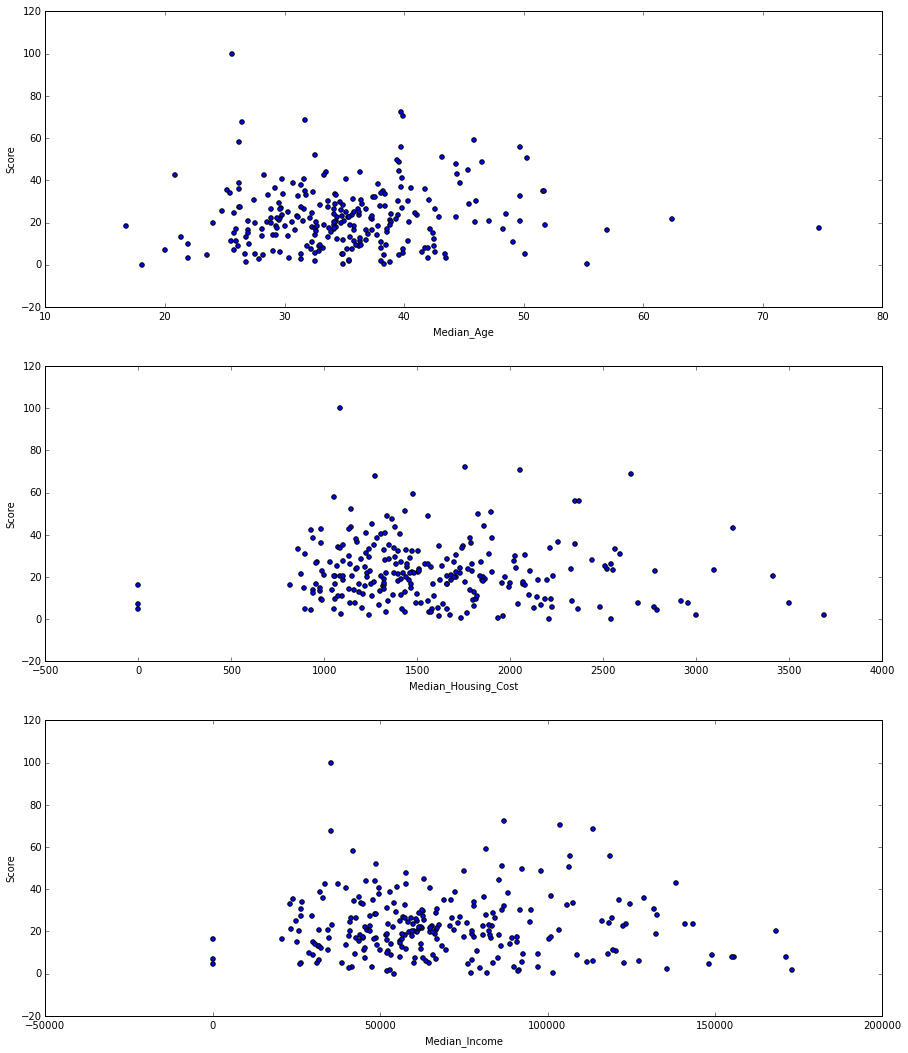

In [84]:
# plot features vs. score
fig, axs = plt.subplots(3, 1, sharey=True)
df_new.plot(kind='scatter', x='Median_Age', y='Score', ax=axs[0], figsize=(15, 18))
df_new.plot(kind='scatter', x='Median_Housing_Cost', y='Score', ax=axs[1])
df_new.plot(kind='scatter', x='Median_Income', y='Score', ax=axs[2])

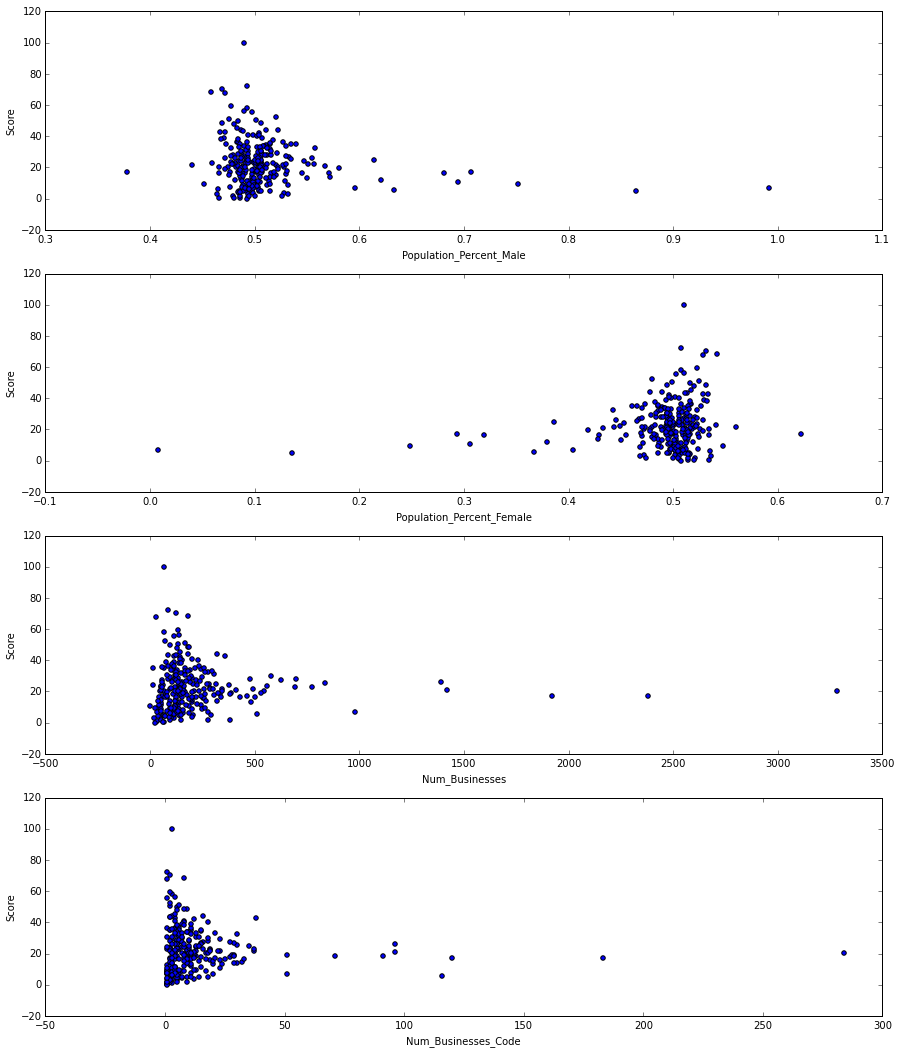

In [85]:
# plot features vs. score
fig, axs = plt.subplots(4, 1, sharey=True)
df_new.plot(kind='scatter', x='Population_Percent_Male', y='Score', ax=axs[0], figsize=(15, 18))
df_new.plot(kind='scatter', x='Population_Percent_Female', y='Score', ax=axs[1])
df_new.plot(kind='scatter', x='Num_Businesses', y='Score', ax=axs[2])
df_new.plot(kind='scatter', x='Num_Businesses_Code', y='Score', ax=axs[3])

In [86]:
# print a summary of the model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     1.262
Date:                Fri, 16 Sep 2016   Prob (F-statistic):              0.206
Time:                        00:35:45   Log-Likelihood:                -1035.1
No. Observations:                 255   AIC:                             2112.
Df Residuals:                     234   BIC:                             2186.
Df Model:                          20                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
Intercept                      7.1148     15.399      0.462      0.644       -23.223    37.453
Population                     0.0002      0.001      0.117      0.907        -0.002     0.003
Population_Percent_Male      -27.0059     15.782     -1.711      0.088       -58.098     4.086
Population_Percent_Female     34.1206     15.812      2.158      0.032         2.969    65.272
Median_Age                    -1.2301      1.019     -1.207      0.229        -3.238     0.778
Median_Age_Male                0.6500      0.516      1.260      0.209        -0.366     1.666
Median_Age_Female              0.6500      0.516      1.260      0.209        -0.366     1.666
Percent_Minor               1375.6268   2082.002      0.661      0.509     -2726.238  5477.492
Percent_Adult               1358.7581   2081.891      0.653      0.515     -2742.887  5460.403
Num_Homes                     -0.0003      0.003     -0.087      0.931        -0.007     0.006
Homes_Percent_Mortgage       -13.6975     20.812     -0.658      0.511       -54.700    27.305
Homes_Percent_Clear          -13.2897     20.824     -0.638      0.524       -54.316    27.737
Homes_Percent_Rent           -13.5826     20.815     -0.653      0.515       -54.591    27.426
Employment_Percentage          0.1443      0.138      1.049      0.295        -0.127     0.415
Median_Income                  0.0002      0.000      1.390      0.166     -7.34e-05     0.000
Median_Income_Owner        -4.176e-05   6.84e-05     -0.611      0.542        -0.000   9.3e-05
Median_Income_Renter       -3.833e-05    6.9e-05     -0.555      0.579        -0.000  9.76e-05
Median_Housing_Cost           -0.0131      0.007     -1.892      0.060        -0.027     0.001
Median_Housing_Cost_Owner      0.0031      0.003      0.901      0.369        -0.004     0.010
Median_Housing_Cost_Renter     0.0046      0.006      0.827      0.409        -0.006     0.016
Parking_Meter_Amount        1.636e-08   7.72e-08      0.212      0.832     -1.36e-07  1.68e-07
Num_Businesses                 0.0093      0.008      1.195      0.233        -0.006     0.025
Num_Businesses_Code           -0.1227      0.092     -1.334      0.184        -0.304     0.058
==============================================================================
Omnibus:                       68.365   Durbin-Watson:                   2.299
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              180.803
Skew:                           1.204   Prob(JB):                     5.49e-40
Kurtosis:                       6.349   Cond. No.                          nan
==============================================================================

Warnings:
[1] The smallest eigenvalue is -5.71e-07. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

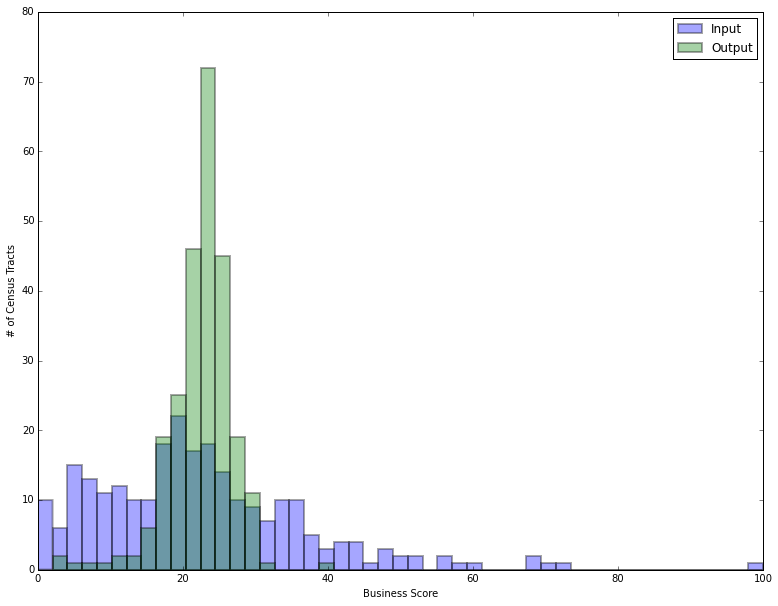

In [87]:
# use coefficients to calculate score for each census tract
scores = lm.predict(df_new)
# make histogram of scores
plt.figure(figsize=(13, 10))
bin_width = 2
bins = np.linspace(min(labels), max(labels), (max(labels)-min(labels))/bin_width)
plt.hist(labels, bins, linewidth=2, alpha=0.35, label='Input');
plt.hist(scores, bins, linewidth=2, alpha=0.35, label='Output');
plt.xlim([min(labels),max(labels)])
plt.legend(loc=0)
plt.xlabel('Business Score')
plt.ylabel('# of Census Tracts')

## Use statsmodels (w/ only one feature)

In [88]:
# turn one feature and labels into dataframe
df_one = pd.DataFrame({'Score': labels, 'Num_Businesses': features[:,20]})
df_one[:10]

,Num_Businesses,Score
0,133.0,50.6
1,182.0,48.8
2,184.0,48.8
3,493.0,21.3
4,480.0,13.3
5,202.0,40.9
6,251.0,15.7
7,214.0,35.1
8,134.0,11.2
9,235.0,20.5


In [89]:
# fit the data
lm = smf.ols(formula='Score ~ Num_Businesses',data=df_one).fit()
# print the coefficients
lm.params

Intercept         22.683887
Num_Businesses    -0.001162
dtype: float64

In [90]:
# use the fit to calculate line of best fit
pop = pd.DataFrame({'Num_Businesses': [df_one['Num_Businesses'].min(), df_one['Num_Businesses'].max()]})
pop_preds = lm.predict(pop)
print pop_preds

[ 22.68272489  18.87038438]


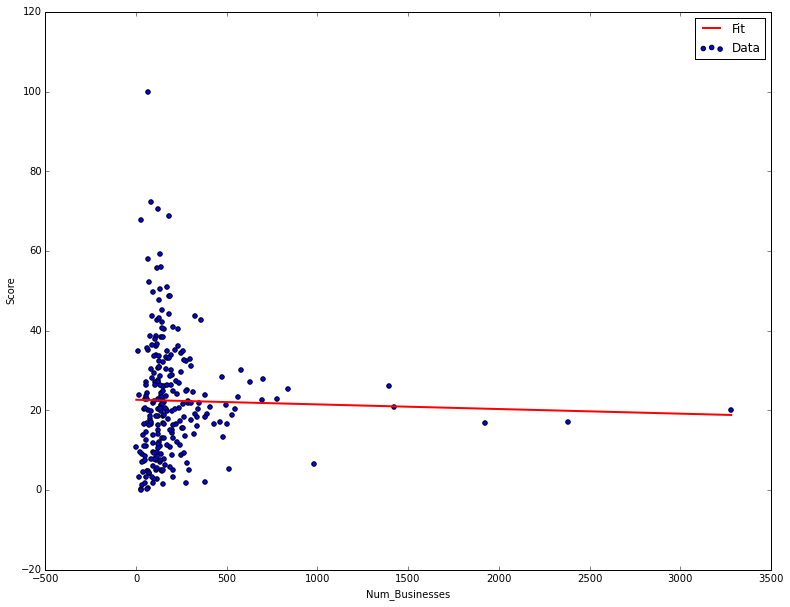

In [91]:
# plot one feature vs. score
df_one.plot(kind='scatter', x='Num_Businesses', y='Score', figsize=(13, 10), label='Data')
plt.plot(pop, pop_preds, c='red', linewidth=2, label='Fit')
plt.legend()

In [92]:
# print a summary of the model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.1563
Date:                Fri, 16 Sep 2016   Prob (F-statistic):              0.693
Time:                        00:35:46   Log-Likelihood:                -1048.0
No. Observations:                 255   AIC:                             2100.
Df Residuals:                     253   BIC:                             2107.
Df Model:                           1                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept         22.6839      1.127     20.119      0.000        20.463    24.904
Num_Businesses    -0.0012      0.003     -0.395      0.693        -0.007     0.005
==============================================================================
Omnibus:                       70.558   Durbin-Watson:                   2.144
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.785
Skew:                           1.272   Prob(JB):                     6.74e-39
Kurtosis:                       6.174   Cond. No.                         466.
==============================================================================
"""

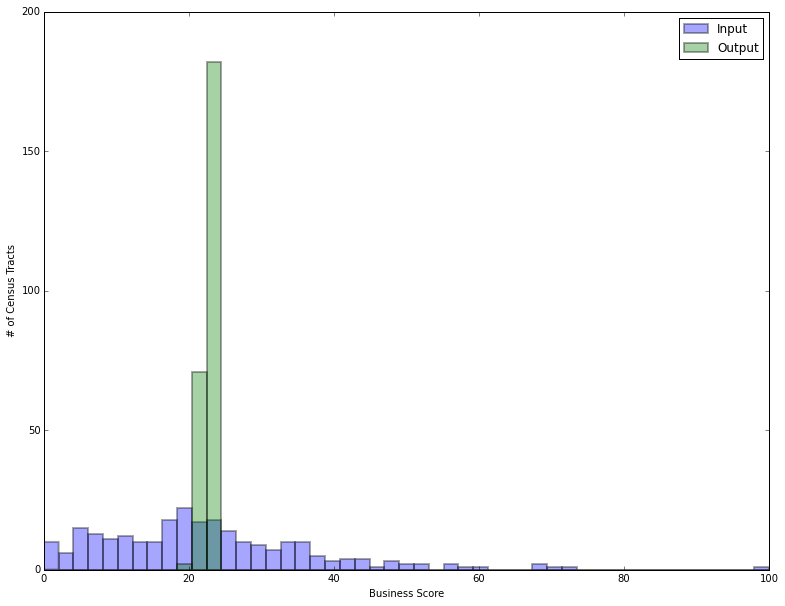

In [93]:
# use coefficients to calculate score for each census tract
scores = lm.predict(df_one)
# make histogram of scores
plt.figure(figsize=(13, 10))
bin_width = 2
bins = np.linspace(min(labels), max(labels), (max(labels)-min(labels))/bin_width)
plt.hist(labels, bins, linewidth=2, alpha=0.35, label='Input');
plt.hist(scores, bins, linewidth=2, alpha=0.35, label='Output');
plt.xlim([min(labels),max(labels)])
plt.legend(loc=0)
plt.xlabel('Business Score')
plt.ylabel('# of Census Tracts')

## Use statsmodels (w/ only one feature, but take out outliers)

In [94]:
# ignore tracts with <5 businesses
cut = features[:,20]>=5
# ignore tracts with >750 businesses
cut = features[:,20]<=750
# ignore tracts with <5 business and >750 businesses
cut = (features[:,20]>=5) & (features[:,20]<=750)
# turn one feature and labels into dataframe
df_one_cut = pd.DataFrame({'Score': labels[cut], 'Num_Businesses': features[cut,20]})
len(df_one_cut)

246

In [95]:
# fit the data
lm_cut = smf.ols(formula='Score ~ Num_Businesses',data=df_one_cut).fit()
# print the coefficients
lm_cut.params

Intercept         22.340929
Num_Businesses     0.001334
dtype: float64

In [96]:
# use the fit to calculate line of best fit
n_bus = pd.DataFrame({'Num_Businesses': [df_one['Num_Businesses'].min(), df_one['Num_Businesses'].max()]})
n_bus_preds = lm_cut.predict(n_bus)
print n_bus

   Num_Businesses
0             1.0
1          3281.0


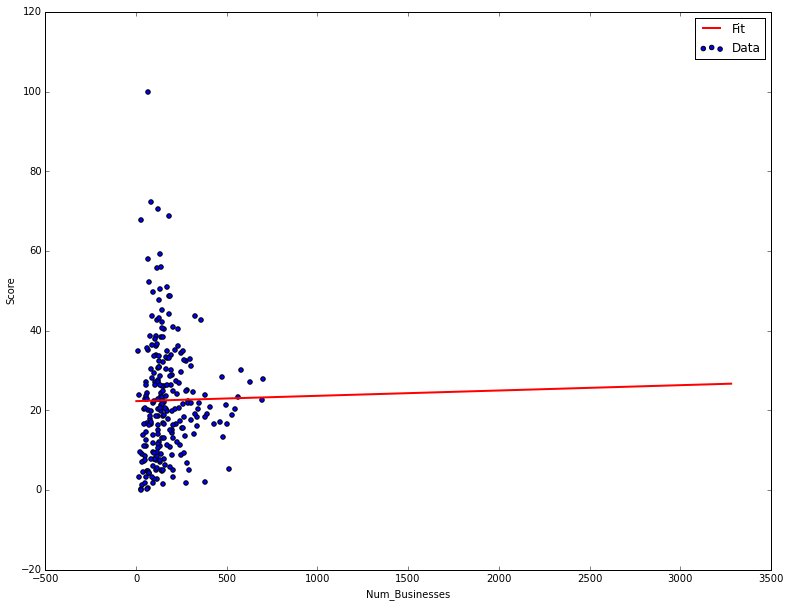

In [97]:
# plot one feature vs. score
df_one_cut.plot(kind='scatter', x='Num_Businesses', y='Score', figsize=(13, 10), label='Data')
plt.plot(n_bus, n_bus_preds, c='red', linewidth=2, label='Fit')
plt.legend(loc=0)

In [98]:
# print a summary of the model
lm_cut.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                   0.02978
Date:                Fri, 16 Sep 2016   Prob (F-statistic):              0.863
Time:                        00:35:47   Log-Likelihood:                -1014.5
No. Observations:                 246   AIC:                             2033.
Df Residuals:                     244   BIC:                             2040.
Df Model:                           1                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept         22.3409      1.648     13.560      0.000        19.096    25.586
Num_Businesses     0.0013      0.008      0.173      0.863        -0.014     0.017
==============================================================================
Omnibus:                       67.990   Durbin-Watson:                   2.152
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.329
Skew:                           1.277   Prob(JB):                     2.07e-36
Kurtosis:                       6.084   Cond. No.                         367.
==============================================================================
"""

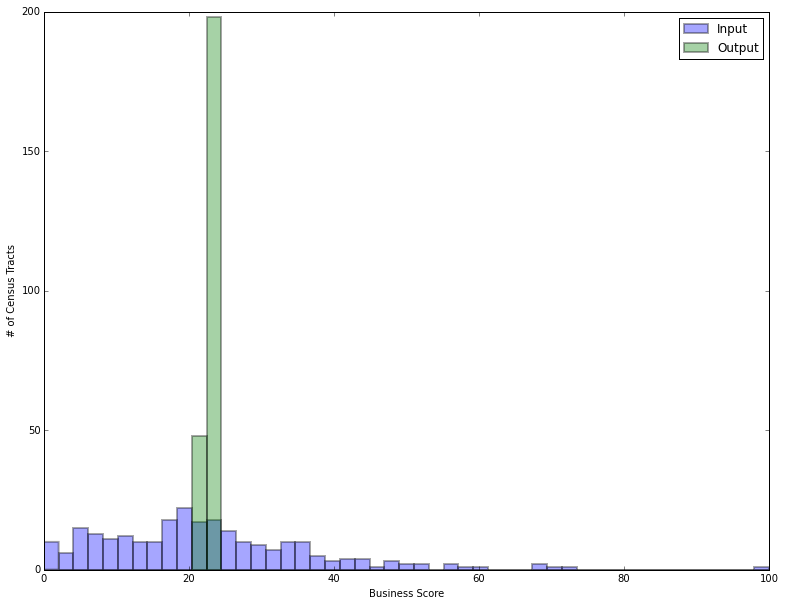

In [99]:
# use coefficients to calculate score for each census tract
scores = lm_cut.predict(df_one_cut)
# make histogram of scores
plt.figure(figsize=(13, 10))
bin_width = 2
bins = np.linspace(min(labels), max(labels), (max(labels)-min(labels))/bin_width)
plt.hist(labels, bins, linewidth=2, alpha=0.35, label='Input');
plt.hist(scores, bins, linewidth=2, alpha=0.35, label='Output');
plt.xlim([min(labels),max(labels)])
plt.legend(loc=0)
plt.xlabel('Business Score')
plt.ylabel('# of Census Tracts')

In [100]:
# read in all census tracts in SD
tracts_all = np.genfromtxt('data_final/tracts_used_all.csv')

# read in all labeled examples
labels_all = np.genfromtxt('data_final/labels_scaled_all.csv')

# read-in all features
if scaled:
    features_all = np.genfromtxt('data_final/features_scaled_all.csv', delimiter=',')
    means_stddevs_all = np.genfromtxt('data_final/means_stddevs_all.csv', delimiter=',')
else:
    features_all = np.genfromtxt('data_final/features_all.csv', delimiter=',')

# define new dataframe
df_tracts_all = pd.DataFrame({'Score': labels_all, 'Num_Businesses': features_all[:,20]})

# recalc scores for all census tracts in SD
scores_all = lm.predict(df_tracts_all)

# make sure all scores are between 1 and 100
scores_all[scores_all<1] = 1
scores_all[scores_all>100] = 100

# write all census tracts and scores to file with other CSVs and flask folder for web
np.savetxt('data_final/tracts_scores'+extra+'.csv', np.stack((tracts_all,scores_all),axis=1), fmt='%.0i %.1f')
np.savetxt('wheresious/static/tracts_scores'+extra+'.csv', np.stack((tracts_all,scores_all),axis=1), fmt='%.0i %.1f')